## 5. Measures of Dispersion

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset from a local folder into a DataFrame

In [2]:
# df = pd.read_csv('data/bottling_maintenance_events.csv')
# df.head()

### Load dataset from url into a DataFrame

In [3]:
import pandas as pd

# Use the raw GitHub URL instead of a local path
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/2_Statistics/data/bottling_maintenance_events.csv"

df = pd.read_csv(url)
df.head()

,event_date,line,asset_id,failure_mode,time_to_failure_days,repair_time_hours,downtime_hours
0,2024-01-02,C,C-M2,Electrical,129.9,3.48,4.94
1,2024-01-02,A,A-M10,Mechanical,19.2,3.93,6.56
2,2024-01-02,C,C-M2,Mechanical,22.4,2.22,3.77
3,2024-01-03,B,B-M5,Mechanical,95.9,6.46,10.79
4,2024-01-09,C,C-M1,Mechanical,64.2,4.83,5.71


### Quantify spread with Range, Interquartile Range (IQR), Variance, and Standard Deviation

These are **measures of dispersion** that describe how spread out the values in a dataset are.

- **Range:** The difference between the maximum and minimum values in the dataset.  
  $  \text{Range} = x_\text{max} - x_\text{min}$  
  **Example:** For [10, 15, 20, 25, 30], Range = 30 - 10 = 20 days.

- **Interquartile Range (IQR):** The difference between the 75th percentile (Q3) and the 25th percentile (Q1).  
  $  \text{IQR} = Q_3 - Q_1$  
  **Example:** For [10, 15, 20, 25, 30], Q1 = 15, Q3 = 25, IQR = 25 - 15 = 10 days.

- **Variance:** The average of the squared differences between each value and the mean.  
  $  \text{Variance } (\sigma^2) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}$  
  **Example:** For [10, 15, 20, 25, 30], Variance = 50 days².

- **Standard Deviation:** The square root of the variance, giving the spread in the same units as the data.  
  $  \text{SD } (\sigma) = \sqrt{\text{Variance}} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$  
  **Example:** For [10, 15, 20, 25, 30], SD = √50 ≈ 7.07 days.

In [4]:
rng_min = df['time_to_failure_days'].min()
rng_max = df['time_to_failure_days'].max()
rng_val = rng_max - rng_min
q1 = df['time_to_failure_days'].quantile(0.25)
q3 = df['time_to_failure_days'].quantile(0.75)
iqr = q3 - q1
var = df['time_to_failure_days'].var(ddof=1)
std = df['time_to_failure_days'].std(ddof=1)
print(f"Range: {rng_val:.1f} (min {rng_min:.1f}, max {rng_max:.1f})")
print(f"IQR: {iqr:.1f} (Q1 {q1:.1f}, Q3 {q3:.1f})")
print(f"Variance: {var:.2f}")
print(f"Std Dev: {std:.2f}")

Range: 398.8 (min 3.6, max 402.4)
IQR: 52.5 (Q1 32.2, Q3 84.8)
Variance: 2554.58
Std Dev: 50.54


#### Box plots

Box plots are excellent for comparing distributions across groups. Look for differences in medians, IQRs, and outliers.

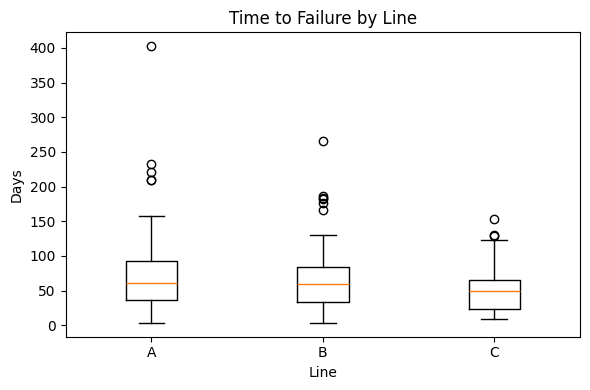

In [5]:
plt.figure(figsize=(6,4))
boxes = [df.loc[df['line']==ln, 'time_to_failure_days'] for ln in ['A','B','C']]
plt.boxplot(boxes, tick_labels=['A','B','C'])
plt.title('Time to Failure by Line')
plt.xlabel('Line')
plt.ylabel('Days')
plt.tight_layout()
plt.show()

### Build side-by-side box plots for repair_time_hours by failure_mode

<Figure size 600x400 with 0 Axes>

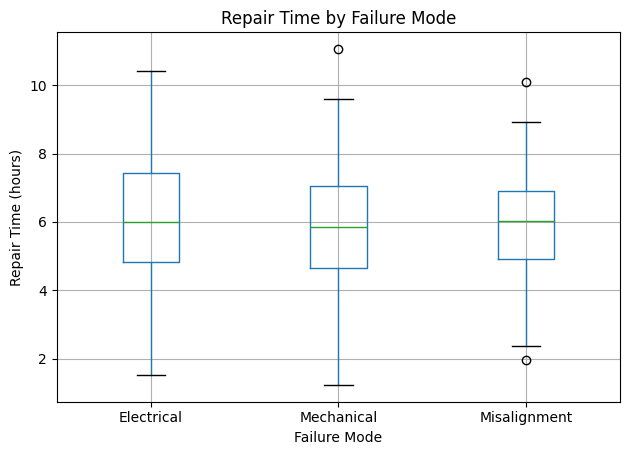

In [6]:
plt.figure(figsize=(6,4))
df.boxplot(column='repair_time_hours', by='failure_mode')
plt.title('Repair Time by Failure Mode')
plt.suptitle('')  # remove automatic title
plt.xlabel('Failure Mode')
plt.ylabel('Repair Time (hours)')
plt.tight_layout()
plt.show()

### Identify which failure mode has the widest spread (IQR)

In [7]:
spread_summary = df.groupby('failure_mode')['repair_time_hours'].describe()[['25%', '75%']]
spread_summary['IQR'] = spread_summary['75%'] - spread_summary['25%']
print("Interquartile Range (IQR) of repair times by failure mode:")
print(spread_summary[['IQR']].sort_values('IQR', ascending=False))

Interquartile Range (IQR) of repair times by failure mode:
               IQR
failure_mode      
Electrical    2.59
Mechanical    2.42
Misalignment  1.97
